# Exploratory data analysis
In this notebook we visualize all the data and find insight.

## 0. Import data

In [1]:
import numpy as np
import pandas as pd

In [2]:
# To prevent memory explode
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

In [3]:
calendar_df = downcast_dtypes(pd.read_csv('calendar.csv'))  
calendar_df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [4]:
sales_df = downcast_dtypes(pd.read_csv('sales_train_evaluation.csv'))
sales_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [5]:
sell_prices_df = downcast_dtypes(pd.read_csv('sell_prices.csv'))
sell_prices_df.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


## 1. Sales by state and store

In [6]:
sell_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int16  
 3   sell_price  float32
dtypes: float32(1), int16(1), object(2)
memory usage: 143.5+ MB


#### 1.1 CA (California)

In [7]:
CA_df = (sales_df[sales_df['state_id'] == 'CA']).copy()
CA_df.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
12191,FOODS_3_823_CA_4_evaluation,FOODS_3_823,FOODS_3,FOODS,CA_4,CA,1,1,1,4,...,1,1,2,0,3,2,1,1,1,0
12192,FOODS_3_824_CA_4_evaluation,FOODS_3_824,FOODS_3,FOODS,CA_4,CA,0,0,0,1,...,1,0,1,0,0,2,0,4,0,0
12193,FOODS_3_825_CA_4_evaluation,FOODS_3_825,FOODS_3,FOODS,CA_4,CA,2,3,2,1,...,1,0,1,1,0,2,1,1,1,0
12194,FOODS_3_826_CA_4_evaluation,FOODS_3_826,FOODS_3,FOODS,CA_4,CA,0,0,0,0,...,1,2,2,2,2,2,0,2,2,4
12195,FOODS_3_827_CA_4_evaluation,FOODS_3_827,FOODS_3,FOODS,CA_4,CA,0,0,0,0,...,1,8,2,16,4,3,4,5,4,0


In [8]:
#convert wide data to long data
CA_df_melt = CA_df.melt(id_vars=['id','item_id', 'dept_id', 'cat_id', 'store_id','state_id'])
CA_df_melt.rename({'variable':'day', 'value':'qty'}, axis=1, inplace=True)

In [65]:
CA_df_melt

,id,item_id,dept_id,cat_id,store_id,state_id,day,qty
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
...,...,...,...,...,...,...,...,...
23672431,FOODS_3_823_CA_4_evaluation,FOODS_3_823,FOODS_3,FOODS,CA_4,CA,d_1941,0
23672432,FOODS_3_824_CA_4_evaluation,FOODS_3_824,FOODS_3,FOODS,CA_4,CA,d_1941,0
23672433,FOODS_3_825_CA_4_evaluation,FOODS_3_825,FOODS_3,FOODS,CA_4,CA,d_1941,0
23672434,FOODS_3_826_CA_4_evaluation,FOODS_3_826,FOODS_3,FOODS,CA_4,CA,d_1941,4


In [9]:
# join calender data and sell data
CA_df_join = pd.merge(calendar_df, CA_df_melt, how='right', left_on='d', right_on='day')
CA_df_join = pd.merge(CA_df_join, sell_prices_df, how='left', on=['store_id', 'item_id', 'wm_yr_wk'])
CA_df_join.drop(columns=['snap_TX', 'snap_WI','id'], inplace=True)
CA_df_join.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,item_id,dept_id,cat_id,store_id,state_id,day,qty,sell_price
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN
1,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN
2,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN
3,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN
4,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN


In [10]:
CA_df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23672436 entries, 0 to 23672435
Data columns (total 20 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   wm_yr_wk      int16  
 2   weekday       object 
 3   wday          int16  
 4   month         int16  
 5   year          int16  
 6   d             object 
 7   event_name_1  object 
 8   event_type_1  object 
 9   event_name_2  object 
 10  event_type_2  object 
 11  snap_CA       int16  
 12  item_id       object 
 13  dept_id       object 
 14  cat_id        object 
 15  store_id      object 
 16  state_id      object 
 17  day           object 
 18  qty           int16  
 19  sell_price    float32
dtypes: float32(1), int16(6), object(13)
memory usage: 2.8+ GB


In this step, we don't care about NaN value in **sell_price** because where qty is 0 the sell price is NaN.

In [11]:
#create 'total_sales' column from total sales_ = qty*sell_price
CA_df_join['total_sales'] = CA_df_join['qty'] * CA_df_join['sell_price']
CA_df_join.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,...,snap_CA,item_id,dept_id,cat_id,store_id,state_id,day,qty,sell_price,total_sales
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN,NaN
1,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN,NaN
2,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN,NaN
3,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN,NaN
4,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN,NaN


#### Sales by month for each store in CA.
Because our data are collected over a long period of time (~ 5 years), days unit is too precise.  

In [12]:
CA_sales_daily_per_store = CA_df_join.groupby(['store_id', 'date'], as_index=False).agg(total_sales=('total_sales','sum'))
CA_sales_daily_per_store['date'] = pd.to_datetime(CA_sales_daily_per_store['date'])
CA_sales_daily_per_store.head()

,store_id,date,total_sales
0,CA_1,2011-01-29,10933.160156
1,CA_1,2011-01-30,9787.059570
2,CA_1,2011-01-31,7201.379883
3,CA_1,2011-02-01,7407.740234
4,CA_1,2011-02-02,6566.120117


In [13]:
CA_store = CA_sales_daily_per_store.pivot(index='date', columns='store_id', values='total_sales')
CA_store

store_id,CA_1,CA_2,CA_3,CA_4
date,,,,
2011-01-29,10933.160156,9101.519531,11679.830078,4561.589844
2011-01-30,9787.059570,8417.530273,12161.459961,4681.410156
2011-01-31,7201.379883,5320.509766,9123.860352,3637.979980
2011-02-01,7407.740234,5550.560059,10249.780273,3708.919922
2011-02-02,6566.120117,5229.720215,9538.650391,3841.139893
...,...,...,...,...
2016-05-18,12920.620117,12766.250000,17780.830078,8116.410156
2016-05-19,13259.900391,13432.940430,18635.349609,8367.570312
2016-05-20,13999.650391,15545.280273,18219.230469,8960.169922


In [14]:
import matplotlib.pyplot as plt
import datetime
# import matplotlib.dates as mdates

Text(0.5, 1.0, 'Sales by store (CA)')

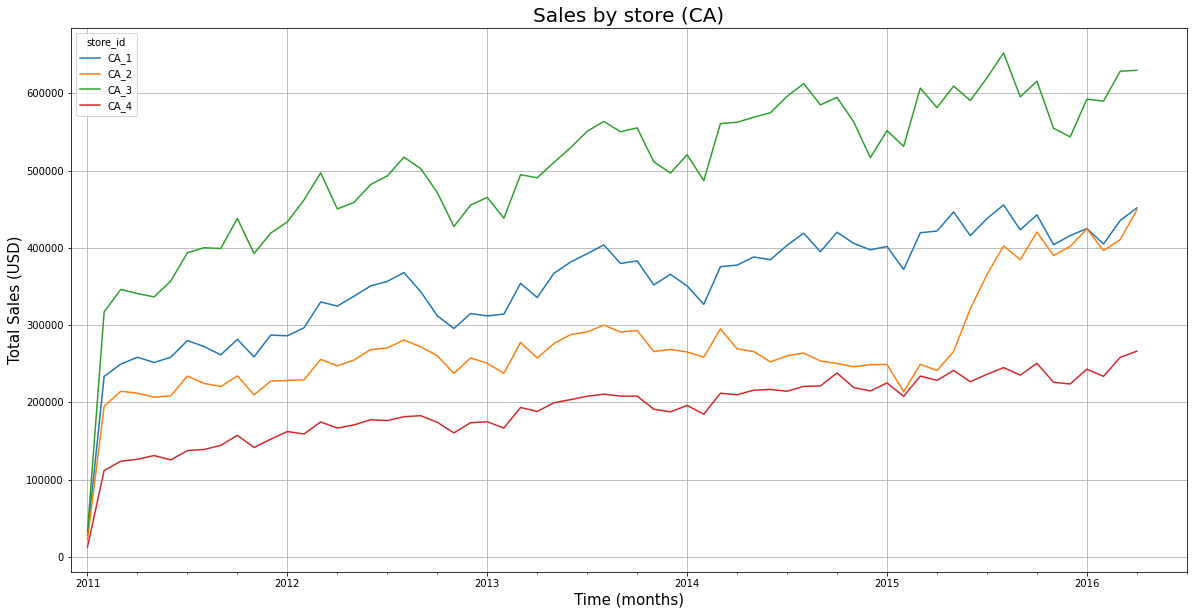

In [18]:
CA_store.resample('M').sum()[:-1].plot(figsize=(20, 10),grid=True,
                xlim=[datetime.datetime(2010,12,1),datetime.datetime(2016,7,1)],
                )
plt.ylabel("Total Sales (USD)",fontsize=15)
plt.xlabel("Time (months)",fontsize=15)
plt.title('Sales by store (CA)',fontsize=20)

#### Sales by catagory

In [19]:
CA_sales_catagories = CA_df_join.groupby(['cat_id','date'],as_index=False).agg(total_sales=('total_sales','sum'))
CA_sales_catagories['date'] =  pd.to_datetime(CA_sales_catagories['date'])
CA_sales_catagories.head()

,cat_id,date,total_sales
0,FOODS,2011-01-29,22019.560547
1,FOODS,2011-01-30,21297.640625
2,FOODS,2011-01-31,14997.200195
3,FOODS,2011-02-01,16272.150391
4,FOODS,2011-02-02,15344.990234


In [20]:
CA_catagories = CA_sales_catagories.pivot(index='date', columns='cat_id', values='total_sales')
CA_catagories.head()

cat_id,FOODS,HOBBIES,HOUSEHOLD
date,,,
2011-01-29,22019.560547,4222.569824,10033.969727
2011-01-30,21297.640625,3412.330078,10337.490234
2011-01-31,14997.200195,3076.199951,7210.330078
2011-02-01,16272.150391,3177.310059,7467.540039
2011-02-02,15344.990234,3038.850098,6791.790039


Text(0.5, 1.0, 'Sales by catagory (CA)')

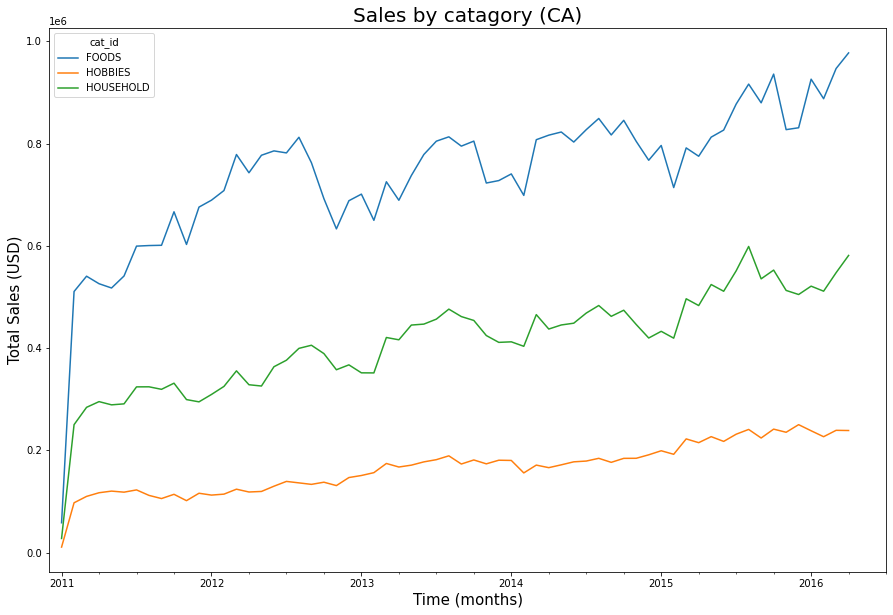

In [29]:
CA_catagories.resample('M').sum()[:-1].plot( figsize=(15, 10),
                xlim=[datetime.datetime(2010,12,1),datetime.datetime(2016,7,1)],
                )
plt.ylabel("Total Sales (USD)",fontsize=15)
plt.xlabel("Time (months)",fontsize=15)
plt.title('Sales by catagory (CA)',fontsize=20)

#### Sales by catagory display in pie chart

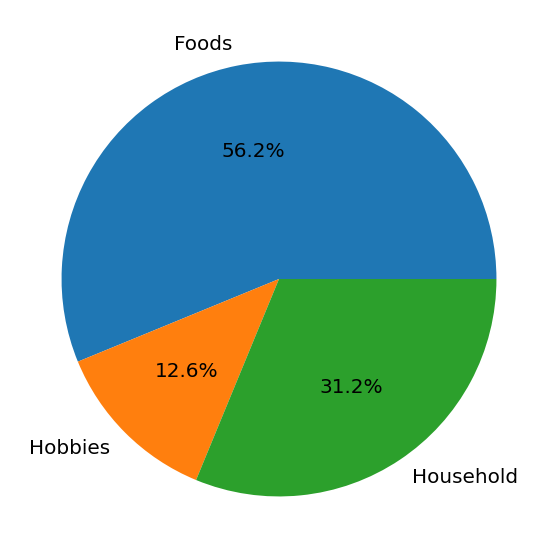

In [24]:
plt.figure(figsize=(20, 10))
plt.pie(CA_catagories.resample('M').sum().agg('sum'),autopct='%1.1f%%',
        labels=['Foods','Hobbies','Household'],textprops={'fontsize': 20})
plt.show()

#### Sales performance by month in CA

In [25]:
CA_total = CA_store.agg('sum', axis="columns")
CA_total

date
2011-01-29    36276.101562
2011-01-30    35047.460938
2011-01-31    25283.730469
2011-02-01    26917.001953
2011-02-02    25175.630859
                  ...     
2016-05-18    51584.113281
2016-05-19    53695.757812
2016-05-20    56724.328125
2016-05-21    76344.320312
2016-05-22    82268.625000
Length: 1941, dtype: float32

Text(0.5, 1.0, 'Total Sales in CA')

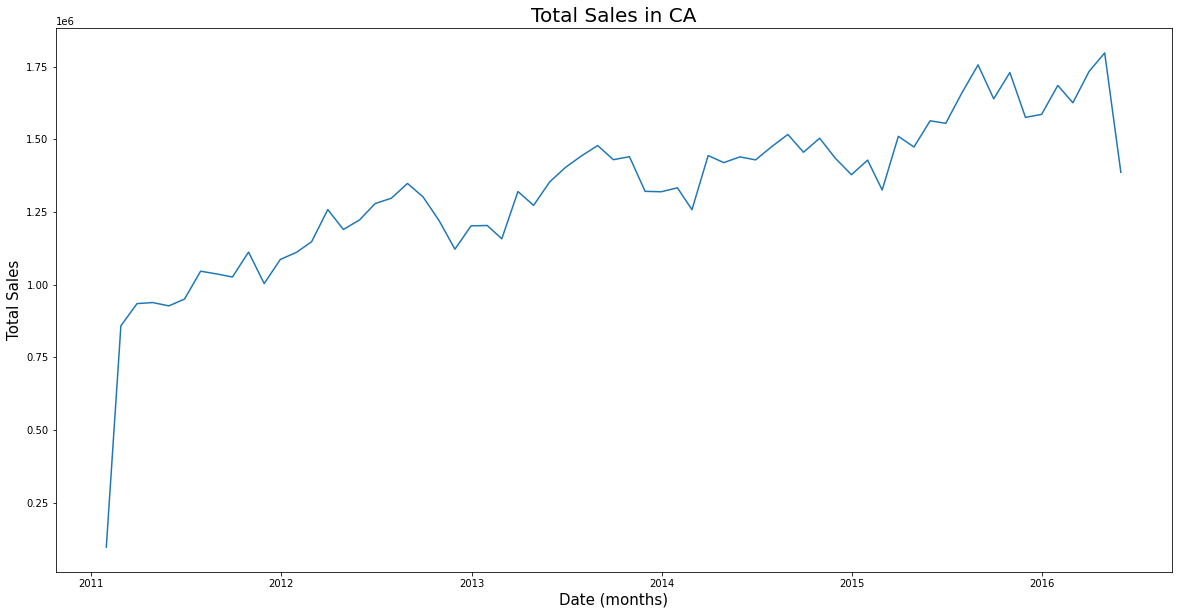

In [26]:
plt.figure(figsize=(20, 10))
plt.plot(CA_total.resample('M').sum())
plt.ylabel("Total Sales",fontsize=15)
plt.xlabel("Date (months)",fontsize=15)
plt.title('Total Sales in CA',fontsize=20)

We can see that the total sales graph is similar to the highest sales store in California.

#### 1.2 TX (Texas)

In [27]:
TX_df = (sales_df[sales_df['state_id'] == 'TX']).copy()

In [28]:
#convert wide data to long data
TX_df_melt = TX_df.melt(id_vars=['id','item_id', 'dept_id', 'cat_id', 'store_id','state_id'])
TX_df_melt.rename({'variable':'day', 'value':'qty'}, axis=1, inplace=True)

# join calender data and sell data
TX_df_join = pd.merge(calendar_df, TX_df_melt, how='right', left_on='d', right_on='day')
TX_df_join = pd.merge(TX_df_join, sell_prices_df, how='left', on=['store_id', 'item_id', 'wm_yr_wk'])
TX_df_join.drop(columns=['snap_CA', 'snap_WI','id'], inplace=True)

#create 'total_sales' column from total sales_ = qty*sell_price
TX_df_join['total_sales'] = TX_df_join['qty'] * TX_df_join['sell_price']
TX_df_join

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,...,snap_TX,item_id,dept_id,cat_id,store_id,state_id,day,qty,sell_price,total_sales
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_1,TX,d_1,0,NaN,NaN
1,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_002,HOBBIES_1,HOBBIES,TX_1,TX,d_1,0,NaN,NaN
2,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_003,HOBBIES_1,HOBBIES,TX_1,TX,d_1,0,NaN,NaN
3,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_004,HOBBIES_1,HOBBIES,TX_1,TX,d_1,1,4.34,4.340000
4,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_005,HOBBIES_1,HOBBIES,TX_1,TX,d_1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17754322,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,0,FOODS_3_823,FOODS_3,FOODS,TX_3,TX,d_1941,1,2.98,2.980000
17754323,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,0,FOODS_3_824,FOODS_3,FOODS,TX_3,TX,d_1941,0,2.48,0.000000
17754324,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,0,FOODS_3_825,FOODS_3,FOODS,TX_3,TX,d_1941,3,3.98,11.940001
17754325,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,0,FOODS_3_826,FOODS_3,FOODS,TX_3,TX,d_1941,2,1.28,2.560000


#### Sales by month for each store in TX.

In [30]:
TX_sales_daily_per_store = TX_df_join.groupby(['store_id', 'date'], as_index=False).agg(total_sales=('total_sales','sum'))
TX_sales_daily_per_store['date'] = pd.to_datetime(TX_sales_daily_per_store['date'])
TX_sales_daily_per_store.head()

TX_store = TX_sales_daily_per_store.pivot(index='date', columns='store_id', values='total_sales')
TX_store

store_id,TX_1,TX_2,TX_3
date,,,
2011-01-29,6586.680176,9915.780273,7597.990234
2011-01-30,6610.600098,9804.540039,7356.540039
2011-01-31,4551.970215,6651.160156,5406.700195
2011-02-01,5374.390137,6985.600098,5597.970215
2011-02-02,4347.069824,6039.049805,4069.739990
...,...,...,...
2016-05-18,9851.969727,11121.030273,12078.070312
2016-05-19,8403.089844,10474.330078,11196.759766
2016-05-20,11296.879883,13832.009766,14667.000000


Text(0.5, 1.0, 'Sales by store (TX)')

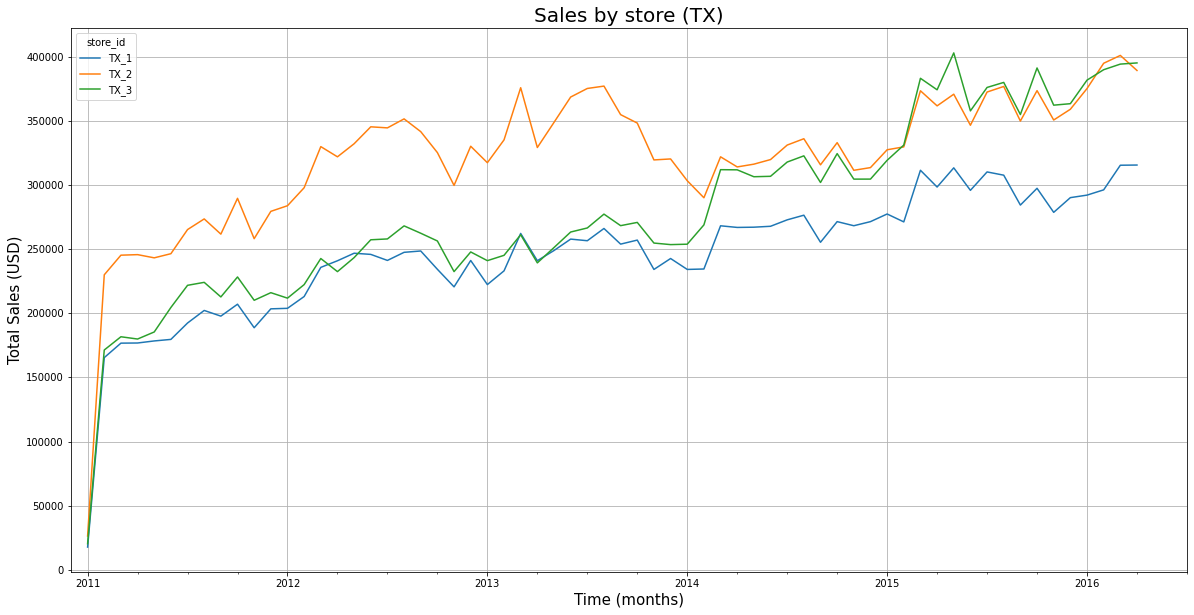

In [31]:
TX_store.resample('M').sum()[:-1].plot(figsize=(20, 10),grid=True,
                xlim=[datetime.datetime(2010,12,1),datetime.datetime(2016,7,1)],
                )
plt.ylabel("Total Sales (USD)",fontsize=15)
plt.xlabel("Time (months)",fontsize=15)
plt.title('Sales by store (TX)',fontsize=20)

#### Sales by catagory in TX

Text(0.5, 1.0, 'Sales by catagory (TX)')

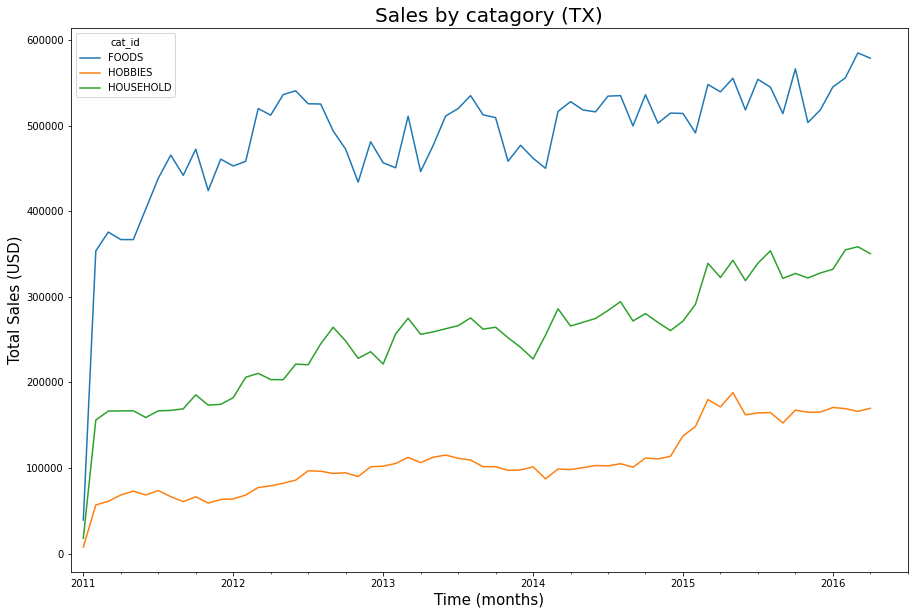

In [33]:
TX_sales_catagories = TX_df_join.groupby(['cat_id','date'],as_index=False).agg(total_sales=('total_sales','sum'))
TX_sales_catagories['date'] =  pd.to_datetime(TX_sales_catagories['date'])

TX_catagories = TX_sales_catagories.pivot(index='date', columns='cat_id', values='total_sales')

TX_catagories.resample('M').sum()[:-1].plot( figsize=(15, 10),
                xlim=[datetime.datetime(2010,12,1),datetime.datetime(2016,7,1)],
                )
plt.ylabel("Total Sales (USD)",fontsize=15)
plt.xlabel("Time (months)",fontsize=15)
plt.title('Sales by catagory (TX)',fontsize=20)

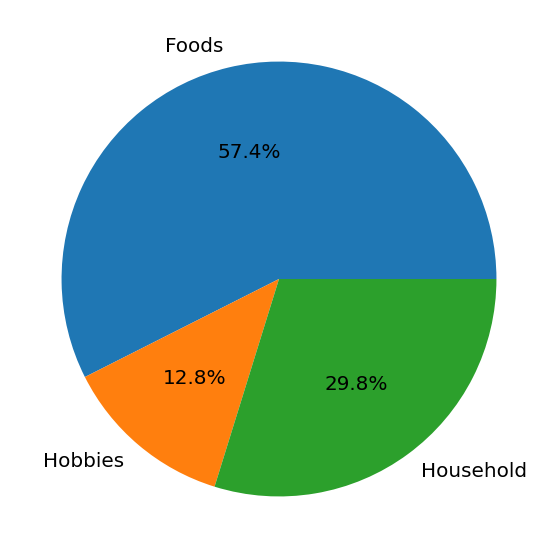

In [34]:
plt.figure(figsize=(20, 10))
plt.pie(TX_catagories.resample('M').sum().agg('sum'),autopct='%1.1f%%',
        labels=['Foods','Hobbies','Household'],textprops={'fontsize': 20})
plt.show()

#### Sales performance in TX

Text(0.5, 1.0, 'Total Sales in TX')

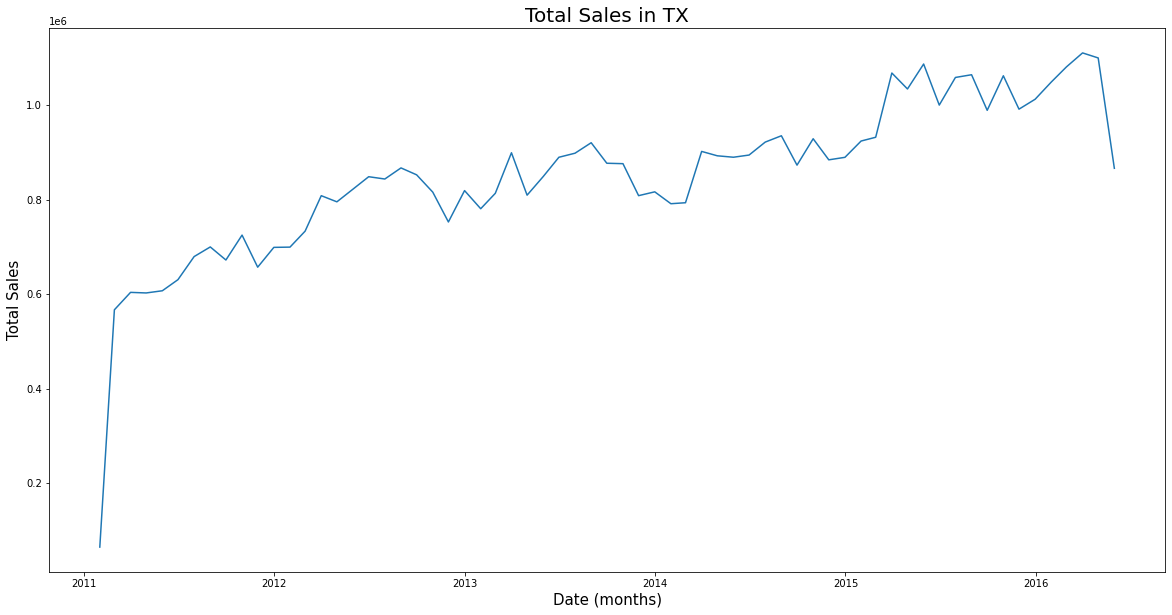

In [35]:
TX_total = TX_store.agg('sum', axis="columns")

plt.figure(figsize=(20, 10))
plt.plot(TX_total.resample('M').sum())
plt.ylabel("Total Sales",fontsize=15)
plt.xlabel("Date (months)",fontsize=15)
plt.title('Total Sales in TX',fontsize=20)

#### 1.2 WI (Wisconsin)

In [36]:
WI_df = (sales_df[sales_df['state_id'] == 'WI']).copy()

#convert wide data to long data
WI_df_melt = WI_df.melt(id_vars=['id','item_id', 'dept_id', 'cat_id', 'store_id','state_id'])
WI_df_melt.rename({'variable':'day', 'value':'qty'}, axis=1, inplace=True)

# join calender data and sell data
WI_df_join = pd.merge(calendar_df, WI_df_melt, how='right', left_on='d', right_on='day')
WI_df_join = pd.merge(WI_df_join, sell_prices_df, how='left', on=['store_id', 'item_id', 'wm_yr_wk'])
WI_df_join.drop(columns=['snap_CA', 'snap_WI','id'], inplace=True)

#create 'total_sales' column from total sales_ = qty*sell_price
WI_df_join['total_sales'] = WI_df_join['qty'] * WI_df_join['sell_price']
WI_df_join

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,...,snap_TX,item_id,dept_id,cat_id,store_id,state_id,day,qty,sell_price,total_sales
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,NaN,NaN
1,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_002,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,NaN,NaN
2,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_003,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,NaN,NaN
3,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_004,HOBBIES_1,HOBBIES,WI_1,WI,d_1,2,4.34,8.68
4,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_005,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17754322,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,0,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1941,1,2.98,2.98
17754323,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,0,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1941,0,2.48,0.00
17754324,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,0,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1941,2,3.98,7.96
17754325,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,...,0,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1941,0,1.28,0.00


#### Sales by each store in WI.

In [37]:
WI_sales_daily_per_store = WI_df_join.groupby(['store_id', 'date'], as_index=False).agg(total_sales=('total_sales','sum'))
WI_sales_daily_per_store['date'] = pd.to_datetime(WI_sales_daily_per_store['date'])
WI_sales_daily_per_store.head()

WI_store = WI_sales_daily_per_store.pivot(index='date', columns='store_id', values='total_sales')
WI_store

store_id,WI_1,WI_2,WI_3
date,,,
2011-01-29,6454.720215,5451.459961,9367.879883
2011-01-30,5645.770020,4636.859863,9868.799805
2011-01-31,3640.120117,4621.580078,7551.649902
2011-02-01,2949.959961,5754.750000,7181.529785
2011-02-02,2.960000,2679.189941,4646.310059
...,...,...,...
2016-05-18,9605.889648,12928.750000,9163.290039
2016-05-19,10478.860352,13547.389648,9660.129883
2016-05-20,11358.750000,14139.330078,11982.370117


Text(0.5, 1.0, 'Sales by store (WI)')

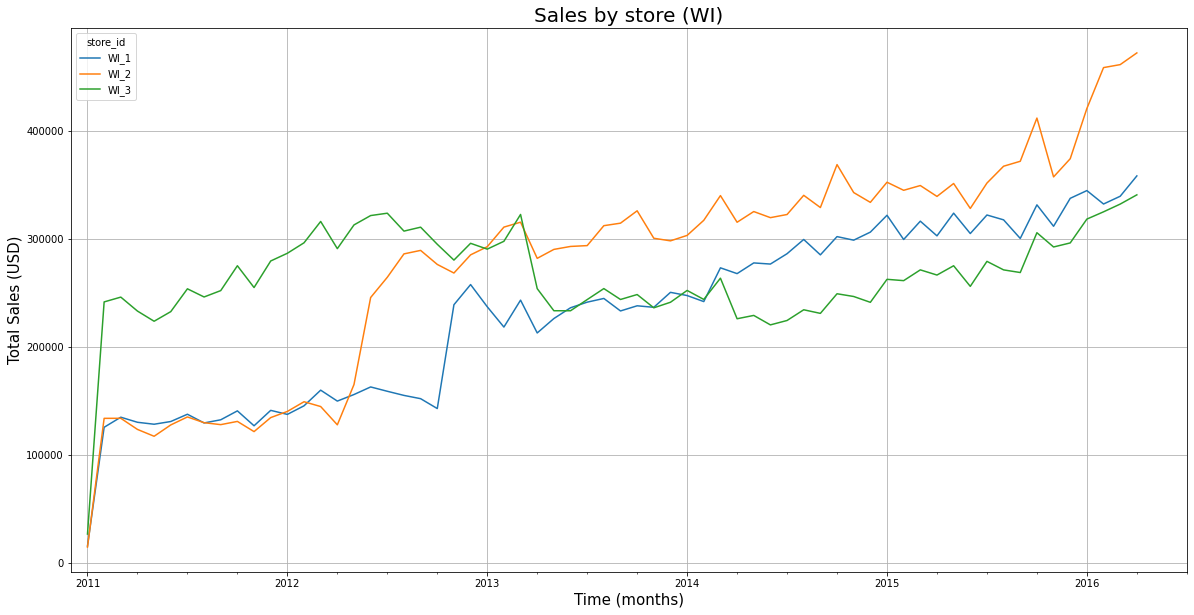

In [39]:
WI_store.resample('M').sum()[:-1].plot(figsize=(20, 10),grid=True,
                xlim=[datetime.datetime(2010,12,1),datetime.datetime(2016,7,1)],
                )
plt.ylabel("Total Sales (USD)",fontsize=15)
plt.xlabel("Time (months)",fontsize=15)
plt.title('Sales by store (WI)',fontsize=20)

There is something interesting happen in 2013 where sales of store WI_3 drop below other stores. We should look for the reason behind this occurrence.

#### Sales by catagory in WI

Text(0.5, 1.0, 'Sales by catagory (WI)')

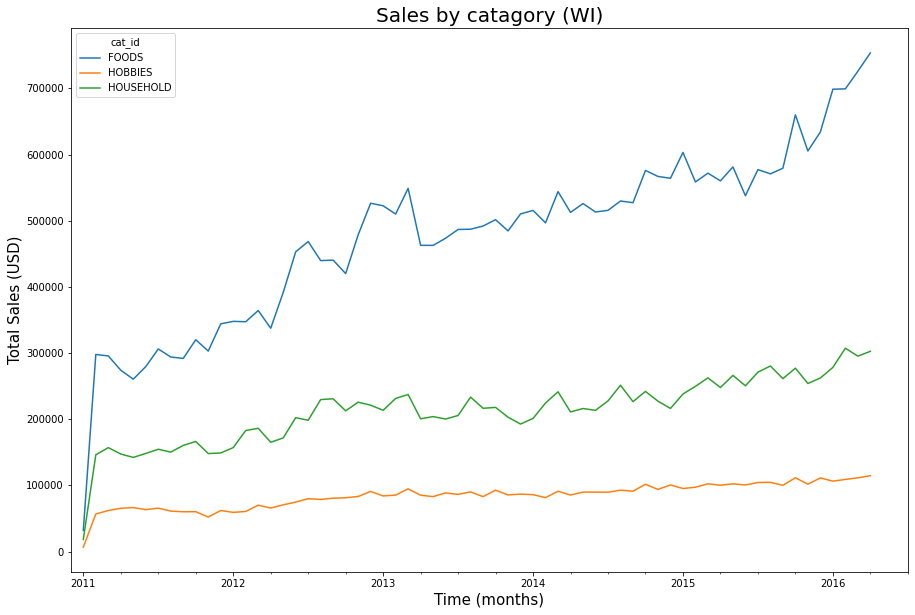

In [41]:
WI_sales_catagories = WI_df_join.groupby(['cat_id','date'],as_index=False).agg(total_sales=('total_sales','sum'))
WI_sales_catagories['date'] =  pd.to_datetime(WI_sales_catagories['date'])

WI_catagories = WI_sales_catagories.pivot(index='date', columns='cat_id', values='total_sales')

WI_catagories.resample('M').sum()[:-1].plot( figsize=(15, 10),
                xlim=[datetime.datetime(2010,12,1),datetime.datetime(2016,7,1)],
                )
plt.ylabel("Total Sales (USD)",fontsize=15)
plt.xlabel("Time (months)",fontsize=15)
plt.title('Sales by catagory (WI)',fontsize=20)

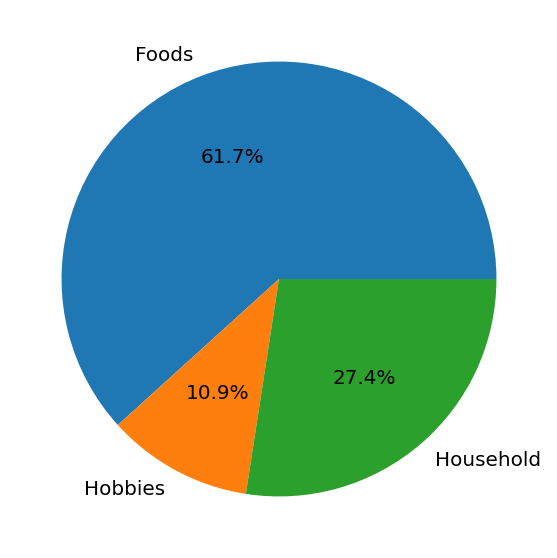

In [42]:
plt.figure(figsize=(20, 10))
plt.pie(WI_catagories.resample('M').sum().agg('sum'),autopct='%1.1f%%',
        labels=['Foods','Hobbies','Household'],textprops={'fontsize': 20})
plt.show()

#### Sales performance in WI

Text(0.5, 1.0, 'Total Sales in WI')

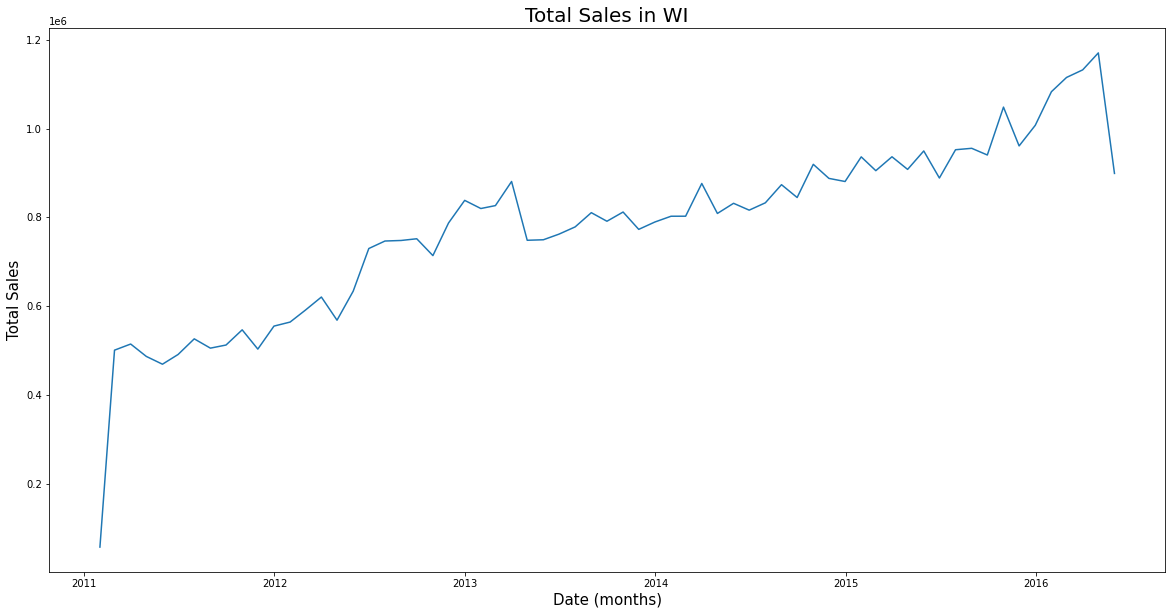

In [43]:
WI_total = WI_store.agg('sum', axis="columns")

plt.figure(figsize=(20, 10))
plt.plot(WI_total.resample('M').sum())
plt.ylabel("Total Sales",fontsize=15)
plt.xlabel("Date (months)",fontsize=15)
plt.title('Total Sales in WI',fontsize=20)

#### 1.4 Compare 3 states

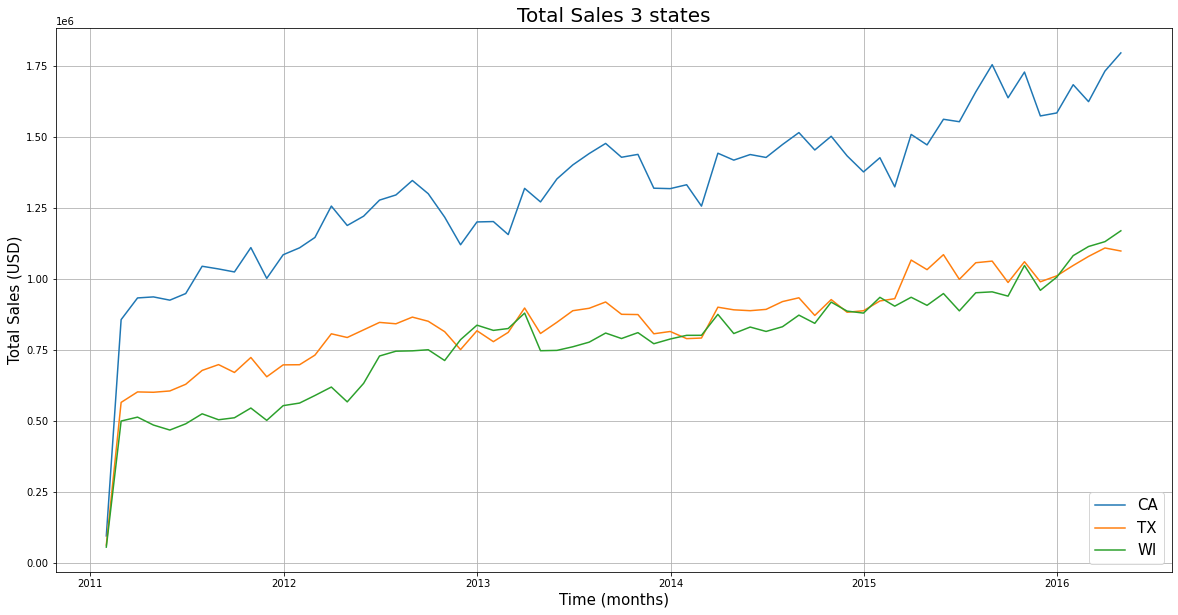

In [45]:
plt.figure(figsize=(20, 10))
plt.plot(CA_total.resample('M').sum()[:-1])
plt.plot(TX_total.resample('M').sum()[:-1])
plt.plot(WI_total.resample('M').sum()[:-1])
plt.ylabel("Total Sales (USD)",fontsize=15)
plt.xlabel("Time (months)",fontsize=15)
plt.grid()
plt.title('Total Sales 3 states',fontsize=20)
plt.legend(['CA','TX','WI'],fontsize =15,loc=4)

From the plot, all states are power law functions (y=x^a, where 0<a<1). Only CA sales are roughly seasonal. When we normalize, CA sales performance shows a drop in total sales at the end and the beginning of the year.

In [46]:
#create bar chart of catagory
bar_df = CA_catagories.resample('M').sum().agg('sum').reset_index().merge(
                  TX_catagories.resample('M').sum().agg('sum').reset_index(),on='cat_id')
bar_df = bar_df.merge(WI_catagories.resample('M').sum().agg('sum').reset_index(),on='cat_id')
bar_df.rename(columns={'0_x':'CA','0_y':'TX',0:'WI'},inplace=True)
bar_df

,cat_id,CA,TX,WI
0,FOODS,48318032.0,31663298.0,31158698.0
1,HOBBIES,10804716.0,7037738.0,5479190.5
2,HOUSEHOLD,26844612.0,16419607.0,13851657.0


In [47]:
#Normalize
bar_df['sum'] = bar_df['CA']+bar_df['TX']+bar_df['WI']
bar_df[['CA','TX','WI']] = bar_df[['CA','TX','WI']]/bar_df['sum'].max()
bar_df

,cat_id,CA,TX,WI,sum
0,FOODS,0.434749,0.284896,0.280355,111140024.0
1,HOBBIES,0.097217,0.063323,0.049300,23321644.0
2,HOUSEHOLD,0.241539,0.147738,0.124632,57115876.0


Text(0, 0.5, 'Normalize total sales')

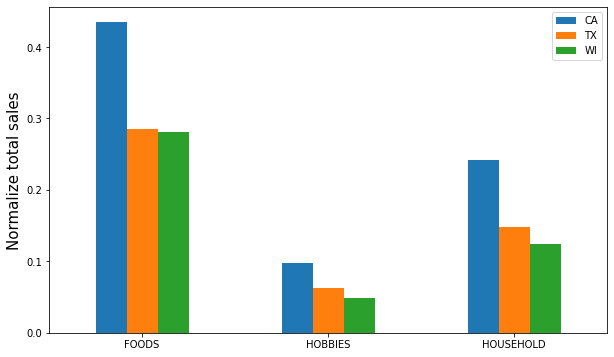

In [50]:
bar_df[['CA','TX','WI']].plot(kind='bar',figsize=(10,6))
plt.xticks([0,1,2], ('FOODS', 'HOBBIES', 'HOUSEHOLD'),rotation=0)
plt.ylabel('Normalize total sales',fontsize=15)

Sales by catagory show the same trend Foods > Household > Hobbies and the most valuable sales came from the California stores.

Let's take a look at the performance of each store.

In [51]:
CA_store_total = CA_store.resample('M').sum().agg('sum')
TX_store_total = TX_store.resample('M').sum().agg('sum')
WI_store_total = WI_store.resample('M').sum().agg('sum')
CA_store_total

store_id
CA_1    22954282.0
CA_2    17848208.0
CA_3    32699138.0
CA_4    12465728.0
dtype: float32

In [52]:
store_pie = pd.concat([CA_store_total,TX_store_total,WI_store_total])
# ,columns=['store_id', 'total_sales']

In [53]:
store_pie = store_pie.reset_index()
store_pie.rename(columns={0:'total_sales'},inplace=True)
store_pie

,store_id,total_sales
0,CA_1,22954282.0
1,CA_2,17848208.0
2,CA_3,32699138.0
3,CA_4,12465728.0
4,TX_1,16037341.0
5,TX_2,20893002.0
6,TX_3,18190300.0
7,WI_1,15107434.0
8,WI_2,18131984.0
9,WI_3,17250126.0


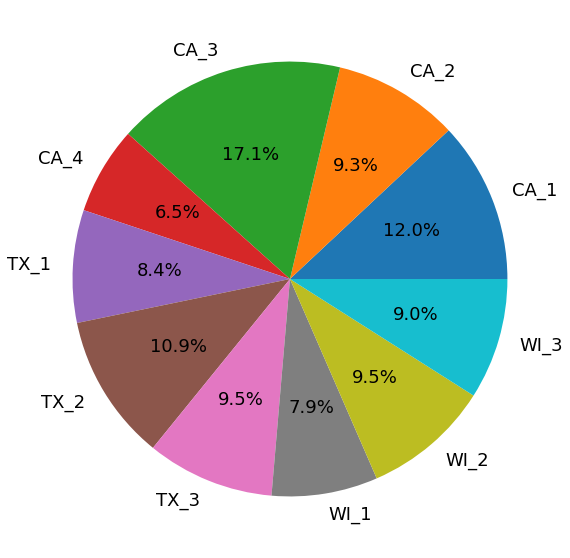

In [54]:
plt.figure(figsize=(20,10))
plt.pie(store_pie['total_sales'],labels=store_pie['store_id'],autopct='%1.1f%%',textprops={'fontsize': 18})
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.pie(store_pie, values='total_sales', names='store_id', title='Sales by store')
fig.update_layout(
    autosize=False,
    width=800,
    height=600)
fig.show()

# plt.figure(figsize=(20,10))
# plt.pie(store_pie['total_sales'],labels=store_pie['store_id'])
# plt.show()

Top 3 highest sales come from CA and TX. All store in WI have total sales lower than 10% of all stores. The lowest total sales is CA_4.

We sum all the sales quantity to do a sales prediction.

In [55]:
CA_total = CA_total.reset_index().rename(columns={0:'CA_sales'})
TX_total = TX_total.reset_index().rename(columns={0:'TX_sales'})
WI_total = WI_total.reset_index().rename(columns={0:'WI_sales'})
CA_total

,date,CA_sales
0,2011-01-29,36276.101562
1,2011-01-30,35047.460938
2,2011-01-31,25283.730469
3,2011-02-01,26917.001953
4,2011-02-02,25175.630859
...,...,...
1936,2016-05-18,51584.113281
1937,2016-05-19,53695.757812
1938,2016-05-20,56724.328125
1939,2016-05-21,76344.320312


In [56]:
CA_copy = CA_total.copy()
TX_copy = TX_total.copy()
WI_copy = WI_total.copy()

In [57]:
Sales_total = pd.merge(CA_copy,pd.merge(TX_copy,WI_copy, how='left',on='date'), how='left',on='date')
Sales_total

,date,CA_sales,TX_sales,WI_sales
0,2011-01-29,36276.101562,24100.451172,21274.058594
1,2011-01-30,35047.460938,23771.679688,20151.429688
2,2011-01-31,25283.730469,16609.832031,15813.349609
3,2011-02-01,26917.001953,17957.960938,15886.240234
4,2011-02-02,25175.630859,14455.859375,7328.459961
...,...,...,...,...
1936,2016-05-18,51584.113281,33051.070312,31697.929688
1937,2016-05-19,53695.757812,30074.179688,33686.378906
1938,2016-05-20,56724.328125,39795.890625,37480.449219
1939,2016-05-21,76344.320312,44046.800781,42004.531250


In [58]:
Sales_total['total_sales'] = Sales_total['CA_sales'] + Sales_total['TX_sales'] + Sales_total['WI_sales']
Sales_total

,date,CA_sales,TX_sales,WI_sales,total_sales
0,2011-01-29,36276.101562,24100.451172,21274.058594,81650.609375
1,2011-01-30,35047.460938,23771.679688,20151.429688,78970.570312
2,2011-01-31,25283.730469,16609.832031,15813.349609,57706.914062
3,2011-02-01,26917.001953,17957.960938,15886.240234,60761.203125
4,2011-02-02,25175.630859,14455.859375,7328.459961,46959.953125
...,...,...,...,...,...
1936,2016-05-18,51584.113281,33051.070312,31697.929688,116333.117188
1937,2016-05-19,53695.757812,30074.179688,33686.378906,117456.312500
1938,2016-05-20,56724.328125,39795.890625,37480.449219,134000.671875
1939,2016-05-21,76344.320312,44046.800781,42004.531250,162395.656250


In [59]:
Sales_total['date'] = pd.to_datetime(Sales_total['date'])

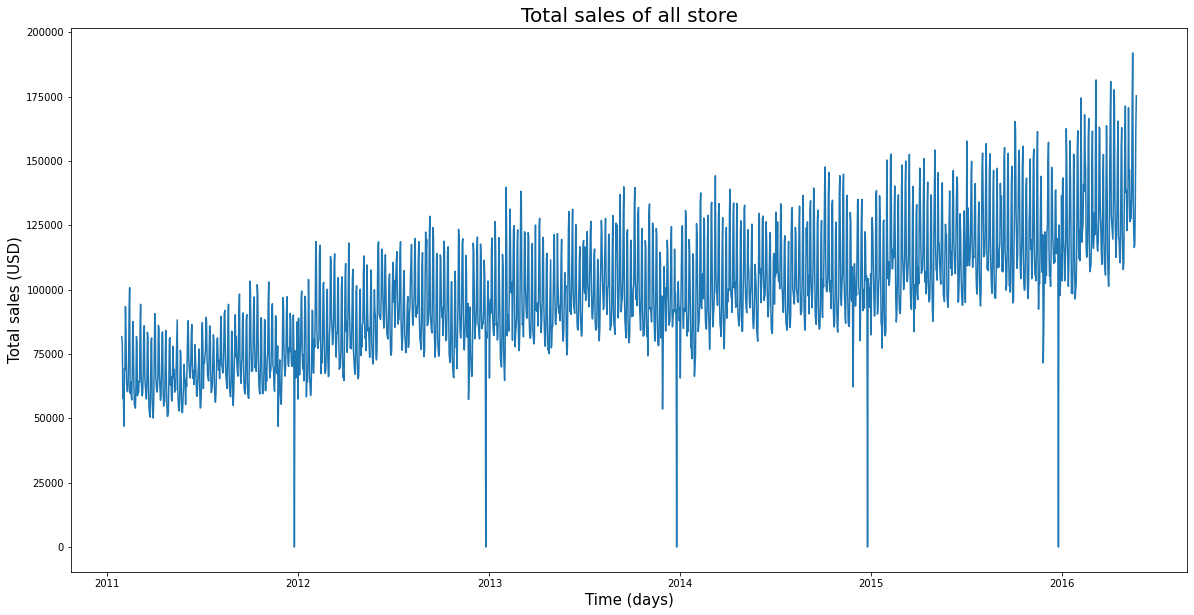

In [62]:
#total sales by days
plt.figure(figsize=(20,10))
plt.plot(Sales_total['date'],Sales_total['total_sales'])
plt.title('Total sales of all store',fontsize=20)
plt.xlabel('Time (days)',fontsize=15)
plt.ylabel('Total sales (USD)',fontsize=15)
plt.show()

C:\Users\pitz\AppData\Local\Temp\ipykernel_7752\33908113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_total_plot['date'] = pd.to_datetime(sales_total_plot['date'])


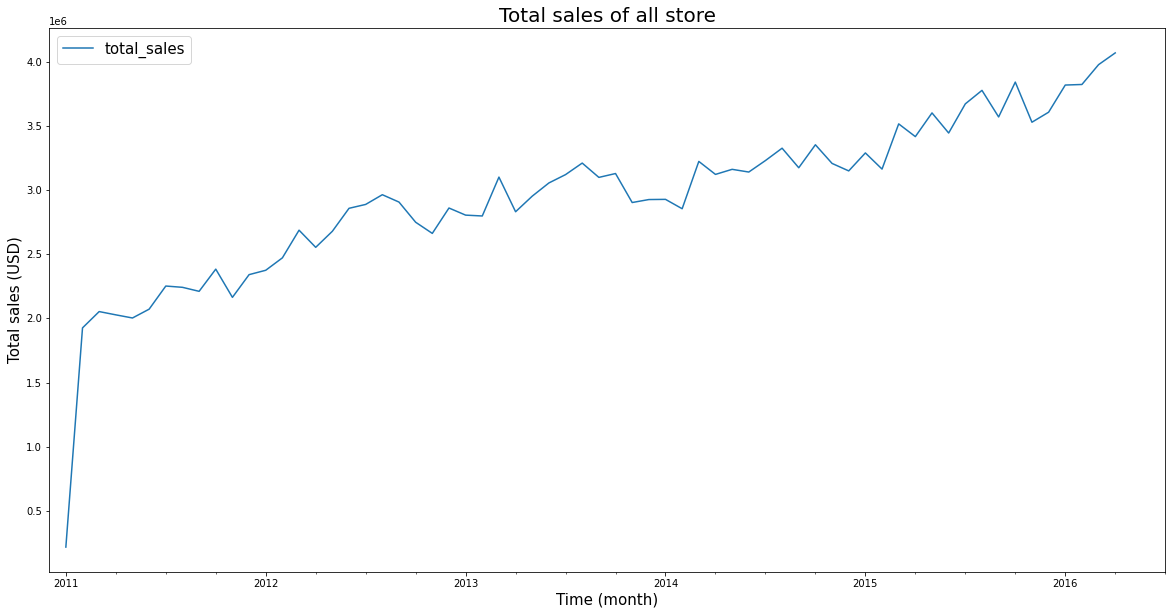

In [64]:
#total sales by month
sales_total_plot = Sales_total[['date','total_sales']]
sales_total_plot['date'] = pd.to_datetime(sales_total_plot['date'])
sales_total_plot.resample('M', on='date').sum()[:-1].plot(figsize=(20,10),
                xlim=[datetime.datetime(2010,12,1),datetime.datetime(2016,7,1)])
plt.legend(loc=2,fontsize=15)
plt.ylabel('Total sales (USD)',fontsize=15)
plt.xlabel('Time (month)',fontsize=15)
plt.title('Total sales of all store',fontsize=20)
plt.show()

In [ ]:
#save to file
# Sales_total.to_csv('sales_total.csv',index=False)
# Sales_total.resample('M', on='date').sum().to_csv('sales_total_month.csv',index=False)

## 3. Further analysis

First, we try to find the season behind total sales amount in each state.

In [66]:
import plotly.express as px

In [67]:
#population data from U.S. Census Bureau, Population Division, Release Date: December 2016
#area data from wikipedia in km^2 unit
usa_pop = pd.DataFrame({'state': ['CA','TX','WI'], 'population': [39250017, 27862596,5778708],'state_area': [423967,695662,169635]})
usa_pop['pop_density'] = usa_pop['population'] / usa_pop['state_area']
usa_pop

,state,population,state_area,pop_density
0,CA,39250017,423967,92.578000
1,TX,27862596,695662,40.051916
2,WI,5778708,169635,34.065541


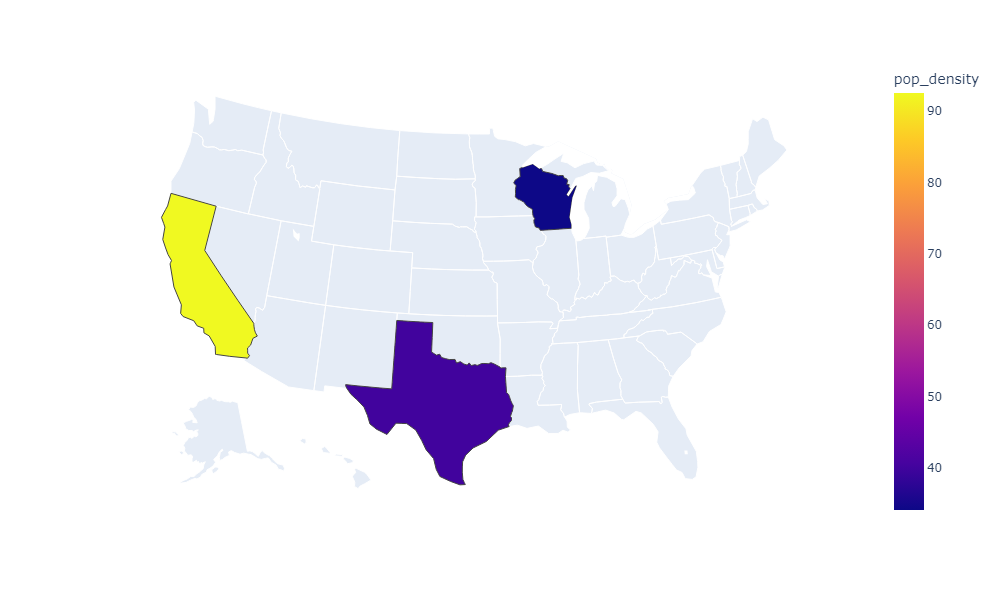

In [69]:
fig = px.choropleth(usa_pop,
                    locations='state', color='pop_density',
                    locationmode = 'USA-states')
fig.update_layout(geo_scope="usa",
    autosize=False,
    width=800,
    height=600)
fig.show()

It's seem like population density is the most contribution factor to total sales. 

Now, we want to find out if our data is periodic.

In [94]:
sales_total_month = sales_total_plot.resample('M',on='date').sum()
sales_total_month.reset_index(inplace=True)
sales_total_month

,date,total_sales
0,2011-01-31,2.183281e+05
1,2011-02-28,1.925878e+06
2,2011-03-31,2.052900e+06
3,2011-04-30,2.027414e+06
4,2011-05-31,2.002988e+06
...,...,...
60,2016-01-31,3.817490e+06
61,2016-02-29,3.821898e+06
62,2016-03-31,3.976338e+06
63,2016-04-30,4.067824e+06


In [105]:
# CA_df = (sales_df[sales_df['state_id'] == 'CA']).copy()
data_12 = sales_total_month[sales_total_month['date'].dt.year==2012]
data_13 = sales_total_month[sales_total_month['date'].dt.year==2013]
data_14 = sales_total_month[sales_total_month['date'].dt.year==2014]
data_15 = sales_total_month[sales_total_month['date'].dt.year==2015]
# data_12_13

In [108]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_12 = scaler.fit_transform(np.array(data_12['total_sales']).reshape(-1,1))
scaled_data_13 = scaler.fit_transform(np.array(data_13['total_sales']).reshape(-1,1))
scaled_data_14 = scaler.fit_transform(np.array(data_14['total_sales']).reshape(-1,1))
scaled_data_15 = scaler.fit_transform(np.array(data_15['total_sales']).reshape(-1,1))

In [115]:
scaled_data_12

array([[0.        ],
       [0.16453028],
       [0.53051376],
       [0.30361176],
       [0.51618767],
       [0.8201146 ],
       [0.8714981 ],
       [1.        ],
       [0.9026065 ],
       [0.6358161 ],
       [0.4880247 ],
       [0.8240199 ]], dtype=float32)

Text(0.5, 1.0, 'Total sales in year')

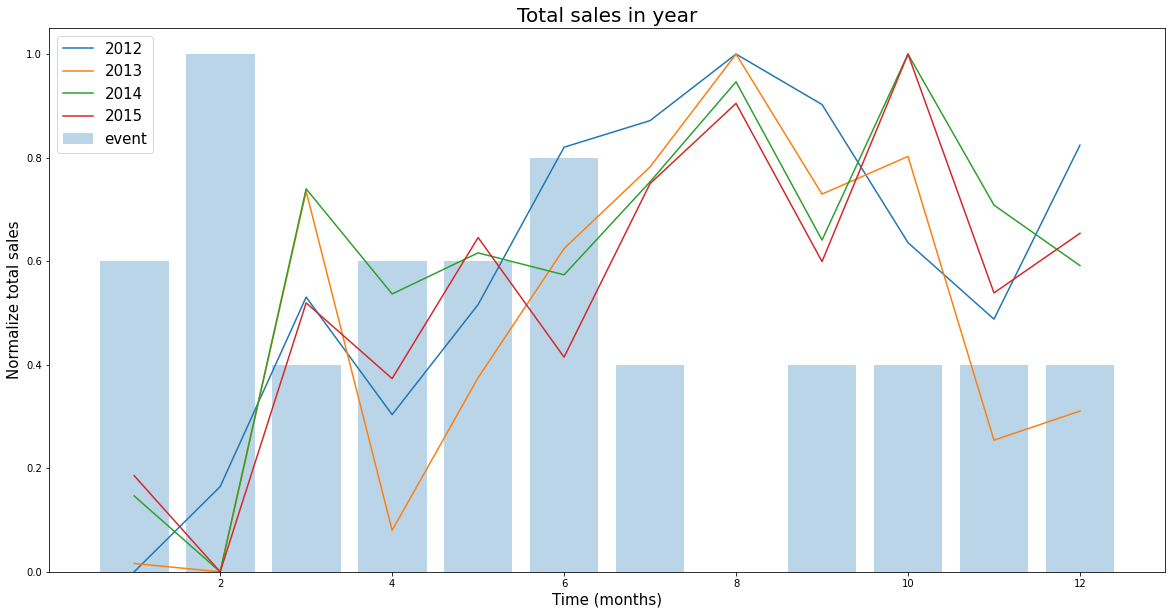

In [172]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(1,13),scaled_data_12)
plt.plot(np.arange(1,13),scaled_data_13)
plt.plot(np.arange(1,13),scaled_data_14)
plt.plot(np.arange(1,13),scaled_data_15)
plt.bar(np.arange(1,13),event_month_plot, alpha=0.3)
plt.legend(['2012','2013','2014','2015','event'],fontsize=15,loc='best')
plt.xlabel('Time (months)',fontsize=15)
plt.ylabel('Normalize total sales',fontsize=15)
plt.title('Total sales in year',fontsize=20)

In [157]:
calendar_df = downcast_dtypes(pd.read_csv('calendar.csv'))  

In [ ]:
event = calendar_df['event_name_1'].unique()
event = set(event)
event

In [158]:
event_in_year = calendar_df[['date','event_name_1']].dropna()
event_in_year

,date,event_name_1
8,2011-02-06,SuperBowl
16,2011-02-14,ValentinesDay
23,2011-02-21,PresidentsDay
39,2011-03-09,LentStart
46,2011-03-16,LentWeek2
...,...,...
1926,2016-05-08,Mother's day
1948,2016-05-30,MemorialDay
1951,2016-06-02,NBAFinalsStart
1956,2016-06-07,Ramadan starts


In [160]:
event_in_year['date'] = pd.to_datetime(event_in_year['date'])
event_count = event_in_year.resample('M',on='date').count()
event_count

# event_in_15 = event_in_year[event_in_year['date'].dt.year==2015]
# event_in_15

,date,event_name_1
date,,
2011-02-28,3,3
2011-03-31,4,4
2011-04-30,2,2
2011-05-31,4,4
2011-06-30,2,2
...,...,...
2016-02-29,5,5
2016-03-31,3,3
2016-04-30,1,1


In [161]:
# event_count.to_csv('event.csv')

In [167]:
event_month_plot = [0.6,1.,0.4,0.6,0.6,0.8,0.4,0.,0.4,0.4,0.4,0.4]

<BarContainer object of 12 artists>

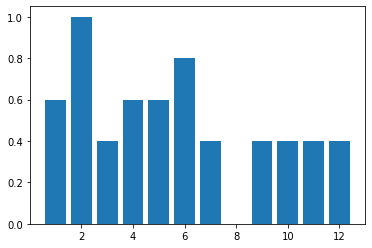

In [168]:
plt.bar(np.arange(1,13),event_month_plot)